In [23]:
%%html
<!–– This code allow the jupyter notebook to run immediately when we do open it
The source of this code is the following : https://stackoverflow.com/questions/31984196/ipython-notebook-run-all-cells-on-open/38856870#38856870––>
<script>
    // AUTORUN ALL CELLS ON NOTEBOOK-LOAD!
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            $(jupyter.events).on("kernel_ready.Kernel", function () {
                console.log("Auto-running all cells-below...");
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
            });
        }
    );
</script>

In [24]:
%%html
<!–– This code allow the jupyter notebook to show no cells and keep the display clean.
The source of the code is the following: https://chris-said.io/2016/02/13/how-to-make-polished-jupyter-presentations-with-optional-code-visibility/––>
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

In [25]:
%%html
<!–– Credit to https://www.w3schools.com/html/ for all the help in building each html display––>
<p> <img style="padding: 0 15px; float: left" src="AppLogo.png" width = '400' height = '116'/></p>
<p style="margin-top: 20px;"> </p>
<p> <h1 style=font-size:85px><em>project</em>WAMP</h1></p>
<center><p> <h1 style=font-size:10px> <em>WAMP is a Machine Learning project with aim of to assit waste classification and recycling <em></h1> </p></center>

In [26]:
%%html
<p> <h1 style=font-size:30px>Objective</h1></p>
<center><p> <em>We aim to educate users on the distinction between recyclable and non-recyclable items and the importance of recycling by using our competencies in research and Machine Learning to build a model that implements both object detection and classification, embedded into a user-friendly application.<em> </p></center>

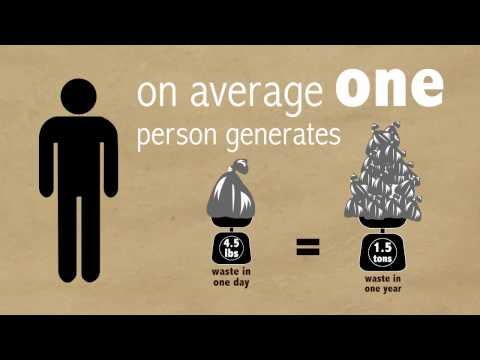

In [27]:
from IPython.display import YouTubeVideo
vid = YouTubeVideo("Rx6_qFHHIOY",width=900, height=576)
display(vid)

In [28]:
%%html
<p> <h1 style=font-size:30px>Test <em>project</em>WAMP Application</h1></p>
<center><p> <em><em> </p></center>

In [29]:
# the following allows you to use the with statement in Python 2.5 but it 
#is part of the language as of Python 2.6. The syntax from module import function 
#generally means that the function from the specified module is made available in the current scope and 
#that it can be called.
from __future__ import division, print_function

In [30]:
# Importing dependencies

import os

#The one line below is supposed to restrict tensorflow to display warning!!!
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'#credit to https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information for the above code
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import tarfile
import shutil

import scipy.misc
import matplotlib
import importlib
import traitlets
import PIL
import sys
import io
import IPython
import keras

from ipywidgets import Button, Layout
from IPython.display import display_html
from IPython.core.display import HTML
from IPython.nbformat.current import read, write
from IPython.display import Image
from PIL import ImageOps
from PIL import Image
from keras.preprocessing import image
from keras.models import load_model
from glob import glob
from ipywidgets import widgets
from tkinter import Tk, filedialog
from IPython.display import Image
from IPython.display import display, clear_output

#Obtain the Model File

file_name = 'ssd_mobilenet_v1_coco_2018_01_28.tar.gz'

#Extract the detection Model Data

dir_name = file_name[0:-len('.tar.gz')]
if os.path.exists(dir_name):
    shutil.rmtree(dir_name) 
tarfile.open(file_name, 'r:gz').extractall('./')

#Extract the detection Model labels necessary for detections. 
#In all honestly this part is none of use for us and is not to be confused with the labels we are using to classify.
#the labels we are extractiong now are mostly for the coco detection model
    
labels = {}
with open('labels.txt', 'r') as labelsFile:
    for line in labelsFile.readlines():
        split = line.strip().split(': ')
        labels[int(split[0])] = split[1]

#Extract the clasification Model names as 'WAMP_3000_EA_model_100+50Ep.h5'

filepath = 'WAMP_3000_EA_model_100+50Ep.h5'
new_model = tf.compat.v1.keras.models.load_model(
    filepath,
    custom_objects=None,
    compile=True)

In [31]:
%%html
<img src="brain.png" width = '1000' height = '400'class="center"/>

In [32]:
# Python script to select an image from your local computer
#Credit given to https://tutel.me/c/codereview/questions/162920/file+selection+button+for+jupyter+notebook
class SelectFilesButton(widgets.Button):
    """A file widget that leverages tkinter.filedialog."""
    def __init__(self):
        super(SelectFilesButton, self).__init__()
        # Add the selected_files trait
        self.add_traits(files=traitlets.traitlets.List())
        # Create the button.
        self.description = "Select Files"
        self.icon = "square-o"
        self.style.button_color = "orange"
        # Set on click behavior.
        self.on_click(self.select_files)
    @staticmethod
    def select_files(b):
        # Create Tk root
        root = Tk()
        # Hide the main window
        root.withdraw()
        # Raise the root to the top of all windows.
        root.call('wm', 'attributes', '.', '-topmost', True)
        # List of selected fileswill be set to b.value
        b.files = filedialog.askopenfilename(multiple=True)
        b.description = "Files Selected"
        b.icon = "check-square-o"
        b.style.button_color = "lightgreen"
my_button = SelectFilesButton()
display(my_button)

SelectFilesButton(description='Select Files', icon='square-o', style=ButtonStyle(button_color='orange'))

In [33]:
def display_image(btn_0):
    display(Image(filename=my_button.files[0],width = 100))

In [34]:
btn_0 = widgets.Button(description='Display Image',layout=Layout(width='20%', height='50px'),button_style='success')
btn_0.on_click(display_image)
display(btn_0)

Button(button_style='success', description='Display Image', layout=Layout(height='50px', width='20%'), style=B…

In [35]:
#This function help us detect object in a particular image
def my_event_handler(btn_object):
    frame = cv2.imread(my_button.files[0])
    #Shape of image
    frame_width_height = frame.shape
    # Find the longer dimension 
    max_dimension = max(frame_width_height)
    # Compute the delta width and height
    width_padding = max_dimension - frame_width_height[1]
    height_padding = max_dimension - frame_width_height[0]
    # Compute the padding amounts
    left_padding = width_padding // 2
    right_padding = width_padding - left_padding
    top_padding = height_padding // 2
    bottom_padding = height_padding - top_padding
    
    # Pad and plot the image
    padding = (left_padding,top_padding,right_padding,bottom_padding)
    #Convert the frame to an Image
    frame_ = PIL.Image.fromarray(frame)
    #Apply padding to image
    padded_frame = ImageOps.expand(frame_, padding, (255,255,255,255))
    #Resize the image
    resized_frame = padded_frame.resize((300, 300), PIL.Image.ANTIALIAS)
    #Load the frozen graph
    frozen_graph = os.path.join(dir_name, 'frozen_inference_graph.pb')
    with tf.compat.v1.gfile.GFile(frozen_graph,'rb') as f:
        graph_def = tf.compat.v1.GraphDef()
        graph_def.ParseFromString(f.read())
    #Convert the Image back to a numpy array
    image_np = np.asarray(resized_frame, dtype="int32")
    input_images = [image_np]
    #Shape of image
    width, height, _ = image_np.shape
    outputs = ('num_detections','detection_classes','detection_scores','detection_boxes',)
    #Run the graph
    with tf.compat.v1.Session() as sess:
        sess.graph.as_default()
        tf.import_graph_def(graph_def, name='')
        detections = sess.run(
          [sess.graph.get_tensor_by_name(f'{op}:0') for op in outputs],
          feed_dict={ 'image_tensor:0': input_images }
      )
        
    #Output
    num_detections = detections[0]
    detection_classes = detections[1]
    detection_scores = detections[2]
    detection_boxes = detections[3]
    
    #Number of object detected
    num_of_items = int(num_detections[0].item())
    
    #Iterate through the number of object detected
    idx = 0
    image__ = matplotlib.image.imsave('new_example.png',image_np)
    image___ = cv2.imread("new_example.png")
    image___ = cv2.cvtColor(image___,cv2.COLOR_BGR2RGB)
    os.mkdir('Image_2_Classify')
    path = 'Image_2_Classify'
    
#This part just include the original image into the path = 'Image_2_Classify' so that even if the 
#detection model does not detect any object, at least we can try to classify something. The detection mode is limites as it can
#only get 80 images
    Original_image = cv2.imread(my_button.files[0], 1)
    cv2.imwrite(os.path.join(path , "Original_image.png"), Original_image)
    display(Image(filename='Image_2_Classify'+'/'+"Original_image.png"))
    
    #Iterate through the number of object detected
    for i in range(num_of_items):
        red = 255
        green = 0
        blue = 0
        scale = 0.5
        thickness = 2
        label = labels[detections[1][0][i]]
        
      #Dimensions of the Rectangle
        top = int(height*detections[3][0][i][0])
        left = int(width*detections[3][0][i][1])
        bottom = int(height*detections[3][0][i][2])
        right = int(width*detections[3][0][i][3])
        output_path = path + "/" + str(idx) + '.png'
      #creating a new image based on the rectangle dimension we selected earlier
        new_img=image___[top:bottom,left:right]
        cv2.imwrite(output_path, new_img)
        display(Image(filename='Image_2_Classify'+'/'+str(idx)+'.png'))
        idx = i+1
    print("Number of Detected Items to classify are:"+"{}".format(1+num_of_items))

In [36]:
btn = widgets.Button(description='Detections',layout=Layout(width='40%', height='50px'),button_style='success')
btn.on_click(my_event_handler)
display(btn) 

Button(button_style='success', description='Detections', layout=Layout(height='50px', width='40%'), style=Butt…

In [37]:
def predict(btn_object):
    #buildind a list with all the name of the object detectect
    classes = ['Blue','Green','Orange','Purple','Red']
    filenames= []
    results = []
    directory = os.fsencode('Image_2_Classify')
    for file in os.listdir(directory):
        filename = os.fsdecode(file) 
        if filename.endswith(".png"):
            filenames.append(str(filename))
            print
            continue
        else:
            continue
    filenames.sort()
#padding those image so we can properly feed them to the classifical model
    for pndex in range(len(filenames)):
        
        test_image = cv2.imread('Image_2_Classify'+'/'+filenames[pndex])
        w_h = test_image.shape
               # Find the longer dimension
        max_d = max(w_h)
               # Compute the delta width and height
        w_padding = max_d - w_h[1]
        h_padding = max_d - w_h[0]
               # Compute the padding amounts
        left_p = w_padding // 2
        right_p = w_padding - left_p
        top_p = h_padding // 2
        bottom_p = h_padding - top_p
        #prep for padding
        padding_ = (left_p,top_p,right_p,bottom_p)
             #conveting to numpy
        test_image_ = PIL.Image.fromarray(test_image)
             #applying padding
        p_frame = ImageOps.expand(test_image_, padding_, (255,255,255,255))
        r_frame = p_frame.resize((224,224), PIL.Image.ANTIALIAS)
       
        test_image = image.img_to_array(r_frame)/255 
        test_image = np.expand_dims(test_image, axis=0)
#feeding the image one by one in the classification model named new_model, we extracted earlier as'WAMP_3000_EA_model_100+50Ep.h5'
        result = new_model.predict(test_image)[0]
        results.append(result)
#Assigning the result to each images we classified earlier
    for k in range(len(filenames)):
        proba = results[k]
        top_3 = list(proba)
        test_image = image.load_img('Image_2_Classify'+'/'+filenames[k])
        for i in range(5):
            print("{}".format(classes[i])+" ({:.3})".format(top_3[i]))
        display(Image('Image_2_Classify'+'/'+filenames[k]))
    shutil.rmtree('Image_2_Classify') 

In [38]:
btn_1 = widgets.Button(description='WAMP-It',layout=Layout(width='60%', height='50px'),button_style='success')
btn_1.on_click(predict)
display(btn_1) 

Button(button_style='success', description='WAMP-It', layout=Layout(height='50px', width='60%'), style=ButtonS…

In [45]:
%%html
<html>
<head>
<style>
.flex-container {
  display: flex;
  justify-content: center;
  align-items: center;
  height: 100px;
}

.flex-container > div {
  background-color: #f1f1f1;
  width: 100px;
  margin: 10px;
  text-align: center;
  line-height: 75px;
  font-size: 30px;
}
</style>
</head>
<body>
<p><h1 style=font-size:30px>Learn more about <em>Your Color</em></h1><p>

<p><em>Click on the box below to know more about </em></p>

<p></p>

<div class="flex-container">
  <div style="background-color:green;"><a href="https://docs.google.com/document/d/1gS3vEMRswtjLqH167WV8flPx7iueW8bBX9DeOP7mFss/edit?usp=sharing">Green</a></div>
  <div style="background-color:blue;"><a href="https://docs.google.com/document/d/1NLzVSbRO-Deo228ISIzW61zn3GFiRvCPlrbUiT5uLUQ/edit?usp=sharing">Blue</a></div>
  <div style="background-color:orange;"><a href="https://docs.google.com/document/d/1qdz14UpzWqQTtebQOY-cogb81zUTGtFSeDI7e0kVYEE/edit?usp=sharing">Orange</a></div>  
  <div style="background-color:purple;"><a href="https://docs.google.com/document/d/13hU9p7eGNNTr9gL0ZLsdiHim4z0qJcRZsbzYIqQTGEQ/edit?usp=sharing">Purple</a></div>
  <div style="background-color:red;"><a href="https://docs.google.com/document/d/1VvwyTBIONDIrmg_XE5B3S3fHS1drgnnLLpIvRQHqQX4/edit?usp=sharing">Red</a></div>
</div>

In [40]:
%%html
<p><h1 style=font-size:30px> Found the nearest <em>WAMPing</em> Center near you </h1><p>
<p></p>
<div style="width: 100%"><iframe width="100%" height="600" src="https://maps.google.com/maps?q=recycle%20center%20near%20me&t=&z=13&ie=UTF8&iwloc=&output=embed" frameborder="0" scrolling="no" marginheight="0" marginwidth="0"><a href="https://www.mapsdirections.info/en/journey-planner.htm">www.mapsdirections.info</a></iframe></div><br />

In [41]:
%%html
<!DOCTYPE html>
<html>
<head>
<style>
div.gallery {
  border: 1px solid #ccc;
}

div.gallery:hover {
  border: 1px solid #777;
}

div.gallery img {
  width: 100%;
  height: 300px;
}

div.desc {
  padding: 15px;
  text-align: center;
}

* {
  box-sizing: border-box;
}
div.a {
  text-align: center;
}

.responsive {
  padding: 0 6px;
  float: left;
  width: 24.99999%;
}

@media only screen and (max-width: 700px) {
  .responsive {
    width: 49.99999%;
    margin: 6px 0;
  }
}

@media only screen and (max-width: 500px) {
  .responsive {
    width: 100%;
  }
}

.clearfix:after {
  content: "";
  display: table;
  clear: both;
}
</style>
</head>
<body>

<p><h1 style=font-size:30px>TEAM MEMBERS</h1><p>

<p><em>Click on Picture to be rdirected to the team members LinkedIn profile member</em></p>
<p></p>
<div class="responsive">
  <div class="gallery">
    <a target="_blank" href="https://www.linkedin.com/in/wayne-chim-060897150/">
      <img src="W.png" width="600" height="400">
    </a>
    <div class="desc"><h2 style="color:black;text-align:center;"</h2>Wayne <center> Chim </center> <p><h5>Email:</p>wayne.chim@macaulay.cuny.edu</h5></p></div>
  </div>
</div>

<div class="responsive">
  <div class="gallery">
    <a target="_blank" href="https://www.linkedin.com/in/aasc/">
      <img src="A.jpg" width="600" height="400">
    </a>
    <div class="desc"><h2 style="color:black;text-align:center;"</h2>Abdoul Aziz S. Coulibaly <p><h5>Email:</p>aascoulibaly20@berkeley.edu</h5></p></div>
  </div>
</div>

<div class="responsive">
  <div class="gallery">
    <a target="_blank" href="https://www.linkedin.com/in/min-henderson-132a0587/">
      <img src="M.png" width="600" height="400">
    </a>
    <div class="desc"> <h2 style="color:black;text-align:center;"</h2> Min <center>Henderson</center><p><h5>Email:</p>mhenderson@baypath.edu</h5></p></div>
  </div>
</div>

<div class="responsive">
  <div class="gallery">
    <a target="_blank" href="https://www.linkedin.com/in/prashamsa-rimal-18a226147/">
      <img src="P.png" width="600" height="400">
    </a>
    <div class="desc"><h2 style="color:black;text-align:center;"</h2> Prashamsa <center>Rimal</center><p><p><h5>Email:</p>prashamsa.rimal97@gmail.com</h5></p></div>
  </div>
</div>

<div class="clearfix"></div>

</body>
</html>

In [42]:
%%html

<p><h2>More About Us </h2><p>

<p> <img style="padding: 0 15px; float: right" src="intensive-map-2019.png" width = '400' height = '116'/></p>
<p style="margin-top: 20px;"> </p>

<p><em>We were selected from over 600 applicants as 4 of a 21-person cohort to take part in a 10 weeks, 
project-based Machine Learning pilot program fully funded by Google at Agnes Scott College, Decatur, GA for 9 credits.
<p>Our programm is officially called Advanced Applied Machine Learning Intensive, also known as AMLI.</p>
</em></p>

<p><a href="https://edu.google.com/computer-science/applied-computing-series/intensive.html">Learn More About AMLI</a></p>
<p><a href="https://www.agnesscott.edu/news/archive/2018/10/agnes-scott-partners-with-google.html">Learn More About AMLI at Agnes Scott College</a></p>


<p> <img style="padding: 0 15px; float: left" src="google.png" width = '250' height = '116'/></p>
<p style="margin-top: 20px;"> </p>

<p> <img style="padding: 0 15px; float: left" src="ASCLOGO.jpg" width = '200' height = '116'/></p>
<p style="margin-top: 10px;"> </p>


In [43]:
%%html
<footer id="attribution" style="float:right; color:#999; background:#fff;">
This Jupyter Notebook Created by Abdoul Aziz Sandotin Coulibaly as part of the ProjectWAMP with team members : Wayne Chim,
Min Henderson, and Prashamsa Rimal.
</footer>

In [44]:
%%html
<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter, delivered by Fastly, rendered by Rackspace.
</footer>